In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import plotly
import plotly.express as px

import plotly.graph_objs as go

import os

In [2]:
GEO_LSOA_PATH = os.getcwd() + '/data/Geo_data/LSOA_2011_London_gen_MHW.shp'
TESCO_PATH = os.getcwd() + '/data/Area_level_data/year_lsoa_grocery.csv'
SOCIO_ECO_LSOA_PATH = os.getcwd() + '/data/lsoa-data.csv'

In [3]:
def load_merge_clean_data(TESCO_PATH, SOCIO_ECO_LSOA_PATH, GEO_LSOA_PATH):
    '''
    This function load the different datasets used for the analysis,
    clean and merge those datasets together to obtain as an output one single panda dataframe
    with the socio-economic, the Tesco and the geography information of each LSOA
    '''
    # load the data with the geography information of each LSOA
    map_df = gpd.read_file(GEO_LSOA_PATH)
    # set the index of this dataframe to the code of each LSOA to facilitate the merge of the dataframes
    map_df.index = map_df['LSOA11CD']
    
    # load the data with the Tesco information of each LSOA
    data_df = pd.read_csv(TESCO_PATH)
    
    # merge the Tesco dataframe with the one with the geo information of the corresponding regions  
    merged_map_df = map_df.join(data_df.set_index('area_id'))
    
    # convert coordinates that are in UTM format into latitude longitude (to plot the results on a map)
    merged_map_df = merged_map_df.to_crs({'init': 'epsg:4326'}) # cause of the warning
    
    # load the data with the socio-economic information of each LSOA
    lsoa_df = pd.read_csv(SOCIO_ECO_LSOA_PATH, encoding = "ISO-8859-1", engine='python')
    # drop the last 2 rows that are full of nan (due to the format of the title of the columns (3 rows))
    lsoa_df.drop(lsoa_df.tail(2).index,inplace=True)
    
    # merge the merged dataframe with  the socio-economic dataframe of the corresponding regions  
    merged_map_lsoa_df = merged_map_df.join(lsoa_df.set_index('Lower Super Output Area'))
    
    # set the index of this dataframe to the name of each LSOA to obtain more comprehensive data
    merged_map_lsoa_df.index = merged_map_lsoa_df['LSOA11NM']
    
    # remove the rows for which we don't have data everywhere 
    # consider the feature of population to determine where we lack some information
    population = np.array((merged_map_lsoa_df['population'])) 
    merged_map_lsoa_df = merged_map_lsoa_df[np.logical_not(np.isnan(population))]
    
    # return this final merged and cleaned dataset
    return merged_map_lsoa_df

In [4]:
df = load_merge_clean_data(TESCO_PATH, SOCIO_ECO_LSOA_PATH, GEO_LSOA_PATH)

//anaconda3/envs/Geopandas_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
df.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,Road Casualties;2012;Slight,Road Casualties;2012;2012 Total,Road Casualties;2013;Fatal,Road Casualties;2013;Serious,Road Casualties;2013;Slight,Road Casualties;2013;2013 Total,Road Casualties;2014;Fatal,Road Casualties;2014;Serious,Road Casualties;2014;Slight,Road Casualties;2014;2014 Total
LSOA11NM,,,,,,,,,,,,,,,,,,,,,
City of London 001A,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,14.0,16.0,0.0,3.0,10.0,13.0,0.0,2.0,10.0,12.0
City of London 001B,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,8.0,9.0,0.0,1.0,5.0,6.0,0.0,0.0,9.0,9.0
City of London 001C,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
City of London 001E,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,22.0,24.0,0.0,5.0,15.0,20.0,1.0,0.0,20.0,21.0
Barking and Dagenham 016A,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,3.0,3.0


## Standardize the features of interest

In [6]:
eco_activ = df['Economic Activity;Employment Rate;2011']
eco_activ_stand = (eco_activ - np.mean(eco_activ))/np.std(eco_activ)

income = df['Household Income, 2011/12;Median Annual Household Income estimate (£)']
income_stand = (income - np.mean(income))/np.std(income)

age = df['avg_age']
age_stand = (age - np.mean(age))/np.std(age)

h_items = df['h_items_norm']
h_items_stand = (h_items - np.mean(h_items))/np.std(h_items)

## Generalized Propensity Score

In [7]:
from causal_curve import GPS

In [8]:
ehtni_feats = ['Ethnic Group;White (%);2011','Ethnic Group;Mixed/multiple ethnic groups (%);2011',
               'Ethnic Group;Asian/Asian British (%);2011', 
               'Ethnic Group;Black/African/Caribbean/Black British (%);2011', 
               'Ethnic Group;Other ethnic group (%);2011']
h_ethnicity = 0
for feat in ehtni_feats:
    val_feat = df[feat]/100
    h_ethnicity += -val_feat * np.log2(val_feat+0.001)
h_ethnicity = h_ethnicity/np.log2(4)

h_ethnicity_stand = (h_ethnicity - np.mean(h_ethnicity))/np.std(h_ethnicity)

In [9]:
stand_df = pd.DataFrame()
stand_df['eco'] = eco_activ_stand
stand_df['income'] = income_stand
stand_df['age'] = age_stand
stand_df['h_items'] = h_items_stand
stand_df['h_ethnicity'] = h_ethnicity_stand

In [10]:
gps = GPS(gps_family=None,
          treatment_grid_num=100,
          lower_grid_constraint=0.01,
          upper_grid_constraint=0.99,
          spline_order=3,
          n_splines=15, # maximum number of turning points (knots) to be used during the smoothing process
          lambda_=0.5,
          max_iter=500,
          random_seed=None,
          verbose=False)

# Fits the causal dose-response model.
gps.fit(T = h_ethnicity_stand, 
        X = stand_df[['eco', 'income', 'age']], 
        y = stand_df['h_items'])

In [11]:
gps_results = gps.calculate_CDRC(0.95)
gps_results.head()

,Treatment,Causal_Dose_Response,Lower_CI,Upper_CI
0,-2.415,-0.692,-0.974,-0.410
1,-2.241,-0.608,-0.874,-0.343
2,-2.121,-0.565,-0.814,-0.317
3,-1.993,-0.524,-0.760,-0.287
4,-1.901,-0.493,-0.725,-0.260


In [12]:
gps.gps_deviance

2491.311248987644

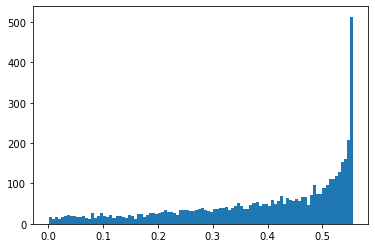

In [13]:
gener_prop_score = gps.gps

plt.hist(gener_prop_score,100);

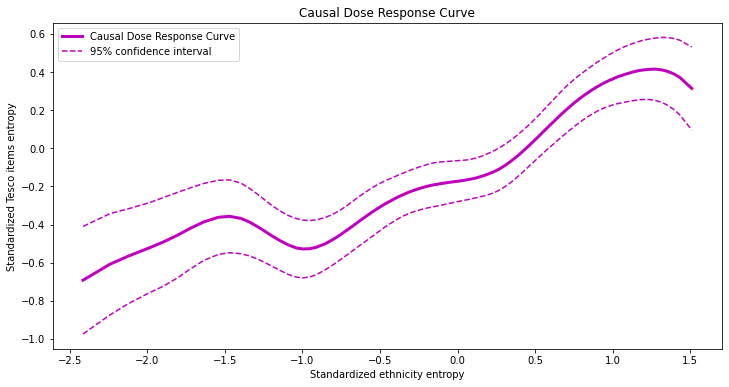

In [14]:
#### THE RESULTS CHANGE A LOT DEPENDING ON THE NUMBER OF SPLINES ###

fig, ax = plt.subplots(figsize=(12,6))
#plt.scatter(h_ethnicity_stand, stand_df['h_items'], s=1, zorder=1)
plt.plot(gps_results['Treatment'], gps_results['Causal_Dose_Response'], label='Causal Dose Response Curve',
         c='m', linewidth=3)
plt.plot(gps_results['Treatment'], gps_results['Lower_CI'], 'm--', label='95% confidence interval')
plt.plot(gps_results['Treatment'], gps_results['Upper_CI'], 'm--')
#plt.ylim(-1,1)
ax.legend()
plt.title('Causal Dose Response Curve') # estimated average dose response function ?
plt.xlabel('Standardized ethnicity entropy')
plt.ylabel('Standardized Tesco items entropy')
plt.show()

In [15]:
# summary of the generalized additive model
# a GAM is a GLM whose linear predictor includes a sum of smooth functions of covariates

# edf, which stands for effective degrees of freedom. 
# This value represents the complexity of the smooth. 
# An edf of 1 is equivalent to a straight line. 
# An edf of 2 is equivalent to a quadratic curve, and so on, with higher edfs describing more wiggly curves.

gps.print_gam_summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     23.5347
Link Function:                     IdentityLink Log Likelihood:                                  -6499.486
Number of Samples:                         4833 AIC:                                            13048.0413
                                                AICc:                                           13048.3019
                                                GCV:                                                0.8638
                                                Scale:                                              0.8562
                                                Pseudo R-Squared:                                    0.148
Feature Function                  Lam

## Looking at a specific ethnicity and a specific food item

In [16]:
f_dairy = df['f_dairy']
f_dairy_stand = (f_dairy - np.mean(f_dairy))/np.std(f_dairy)

f_asian = df['Ethnic Group;Asian/Asian British (%);2011']
f_asian_stand = (f_asian - np.mean(f_asian))/np.std(f_asian)

In [17]:
stand_df = pd.DataFrame()
stand_df['eco'] = eco_activ_stand
stand_df['income'] = income_stand
stand_df['age'] = age_stand
stand_df['f_dairy'] = f_dairy_stand
stand_df['f_asian'] = f_asian_stand

In [18]:
gps = GPS(gps_family=None,
          treatment_grid_num=100,
          lower_grid_constraint=0.01,
          upper_grid_constraint=0.99,
          spline_order=3,
          n_splines=15, # maximum number of turning points (knots) to be used during the smoothing process
          lambda_=0.5,
          max_iter=500,
          random_seed=None,
          verbose=False)

# Fits the causal dose-response model.
gps.fit(T = stand_df['f_asian'], 
        X = stand_df[['eco', 'income', 'age']], 
        y = stand_df['f_dairy'])

In [19]:
gps_results = gps.calculate_CDRC(0.95)

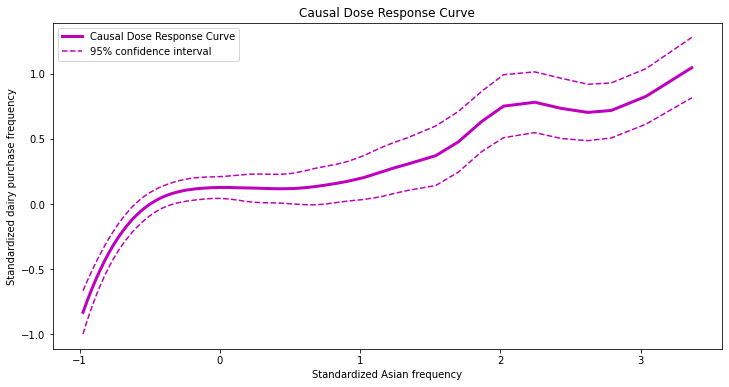

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(gps_results['Treatment'], gps_results['Causal_Dose_Response'], label='Causal Dose Response Curve',
         c='m', linewidth=3)
plt.plot(gps_results['Treatment'], gps_results['Lower_CI'], 'm--', label='95% confidence interval')
plt.plot(gps_results['Treatment'], gps_results['Upper_CI'], 'm--')
#plt.ylim(-1,1)
ax.legend()
plt.title('Causal Dose Response Curve') # estimated average dose response function ?
plt.xlabel('Standardized Asian frequency')
plt.ylabel('Standardized dairy purchase frequency')
plt.show()

#### De-Standardize the values

In [21]:
#(f_asian - np.mean(f_asian))/np.std(f_asian)
treat_destd = gps_results['Treatment']*np.std(f_asian) + np.mean(f_asian)
cdr_destd = gps_results['Causal_Dose_Response']*np.std(f_dairy) + np.mean(f_dairy)
cdr_destd_low95 = gps_results['Lower_CI']*np.std(f_dairy) + np.mean(f_dairy)
cdr_destd_up95 = gps_results['Upper_CI']*np.std(f_dairy) + np.mean(f_dairy)

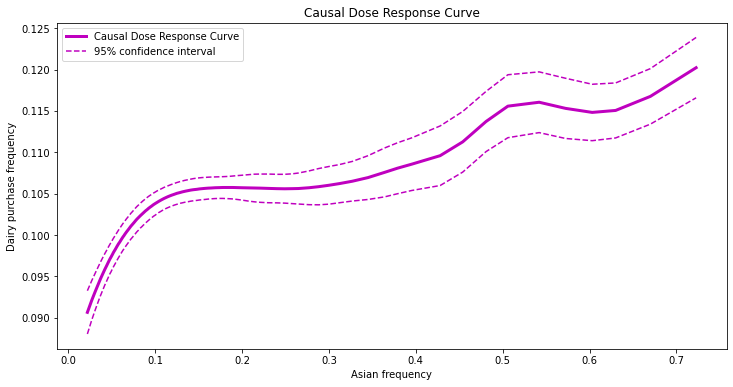

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(treat_destd/100, cdr_destd, label='Causal Dose Response Curve',
         c='m', linewidth=3)
plt.plot(treat_destd/100, cdr_destd_low95, 'm--', label='95% confidence interval')
plt.plot(treat_destd/100, cdr_destd_up95, 'm--')
#plt.ylim(-1,1)
ax.legend()
plt.title('Causal Dose Response Curve') # estimated average dose response function ?
plt.xlabel('Asian frequency')
plt.ylabel('Dairy purchase frequency')
plt.show()